# One class classification on data set iris

In [3]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt 

iris = load_iris(as_frame=True)

In [4]:
iris 

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [5]:
from sklearn import svm
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, cross_val_score, cross_val_predict

In [6]:
X, y = iris.data, iris.target

In [7]:
X.insert(loc=4, column='class', value=y)

In [8]:
setosa = X[X['class'] == 0]
setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
versicolor = X[X['class'] == 1]
versicolor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [10]:
virginica = X[X['class'] == 2]
virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2
105,7.6,3.0,6.6,2.1,2
106,4.9,2.5,4.5,1.7,2
107,7.3,2.9,6.3,1.8,2
108,6.7,2.5,5.8,1.8,2
109,7.2,3.6,6.1,2.5,2


In [11]:
from collections import defaultdict

def one_class_holdout(X):
    clf = svm.OneClassSVM(kernel='rbf', gamma='scale')
    X = X.drop(columns='class')

    scores = defaultdict()

    for i in np.arange(0.1, 0.99, 0.1):
        temp = []

        for j in range(21):
            X_train, X_test = train_test_split(X, train_size=i, random_state=j)

            clf.fit(X_train)
            preds = clf.predict(X_test)

            tot = preds.size
            n_corr = sum([1 if pred == 1 else 0 for pred in preds])
            n_uncorr = sum([1 if pred == -1 else 0 for pred in preds])

            score = n_corr / tot 
            temp.append(score)

        scores[i] = np.mean(temp)

    best = max(scores, key=scores.get)
            
    return best, scores[best]

one_class_holdout(setosa)


(0.8, 0.5714285714285713)

In [12]:
one_class_holdout(virginica), one_class_holdout(versicolor)

((0.9, 0.5523809523809524), (0.9, 0.5238095238095238))

In [13]:
def one_class_kfold(X):
    clf = svm.OneClassSVM(kernel='rbf', gamma='scale')
    X = X.drop(columns='class')

    res = defaultdict()
    for i in range(2, 10):
        all_scores = []

        for j in range(21):
            cv = KFold(n_splits=i, shuffle=True, random_state=j)

            scores = []
            for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X)):
                X_train, X_test = X.values[train_idx], X.values[test_idx]

                clf.fit(X_train)
                predictions = clf.predict(X_test)

                n_corr = sum([1 if pred==1 else 0 for pred in predictions])
                score = n_corr / predictions.size

                scores.append(score)
            
            all_scores.append(np.mean(scores))
        
        res[i] = np.mean(all_scores)
    
    best = max(res, key=res.get)
    return best, res[best]

one_class_kfold(setosa)

(2, 0.49809523809523804)

In [14]:
one_class_kfold(versicolor), one_class_kfold(virginica)

((4, 0.4991605616605617), (6, 0.49503968253968256))

In [15]:
def one_class_predictions(X, Y, Z):
    clf = svm.OneClassSVM(kernel='rbf', gamma='scale')
    X = X.drop(columns='class')
    Y = Y.drop(columns='class')
    Z = Z.drop(columns='class')

    scores = defaultdict()
    errors = defaultdict()

    for i in range(2,10):
        curr_scores = []
        curr_errors = []

        for j in range(21):
            cv = KFold(n_splits=i, shuffle=True, random_state=j)
            
            for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X)):
                X_train, X_test = X.values[train_idx], X.values[test_idx]
                clf.fit(X_train)

                predictions_X = clf.predict(X_test)
                predictions_Y = clf.predict(Y.values)
                predictions_Z = clf.predict(Z.values)

                n_corr_x = sum([1 if pred == 1 else 0 for pred in predictions_X])
                n_corr_y = sum([1 if pred == -1 else 0 for pred in predictions_Y])
                n_corr_z = sum([1 if pred == -1 else 0 for pred in predictions_Z])
                
                n_corr_x = sum([1 if pred == 1 else 0 for pred in predictions_X])
                correct_score = n_corr_x / predictions_X.size 
                correct_error = 1 - ((n_corr_y + n_corr_z) / (predictions_Y.size + predictions_Z.size))

                curr_scores.append(correct_score)
                curr_errors.append(correct_error)
        
        scores[i] = np.mean(curr_scores)
        errors[i] = np.mean(curr_errors)

    best_score = max(scores, key=scores.get)
    best_error = min(errors, key=errors.get)

    return best_score, scores[best_score], best_error, errors[best_error]
    
one_class_predictions(setosa, versicolor, virginica)

(2, 0.49809523809523804, 2, 0.0)

In [16]:
one_class_predictions(versicolor, setosa, virginica)

(4, 0.4991605616605616, 9, 5.291005291005296e-05)

In [17]:
one_class_predictions(virginica, setosa, versicolor)

(6, 0.49503968253968256, 2, 0.009047619047619056)

In [26]:
def nested_cv(X, Y, Z):
    kernels = ['linear', 'rbf', 'poly']
    gammas = np.logspace(-2, 3, 10)
    nus = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
    
    X = X.drop(columns='class')
    Y = Y.drop(columns='class')
    Z = Z.drop(columns='class')

    scores = []
    error_rates = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    results = defaultdict()
    b_params = ()

    for seed in range(17, 170, 10):
        outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)
        
        best_f1 = 0

        for _, (train_idx, test_idx) in enumerate(outer_cv.split(X)):
            X_train, X_test = X.values[train_idx], X.values[test_idx]

            inner_cv = KFold(n_splits=3, shuffle=True, random_state=seed)
            for _, (train_idx1, valid_idx) in enumerate(inner_cv.split(X_train)):
                X_train1, X_valid = X_train[train_idx1], X_train[valid_idx]

                for kernel in kernels:
                    if kernel == 'poly':
                        for degree in [3, 5, 7]:
                            for nu in nus:
                                clf = svm.OneClassSVM(kernel=kernel, degree=degree, nu=nu)
                                clf.fit(X_train1)

                                preds_X = clf.predict(X_valid)
                                preds_Y = clf.predict(Y.values)
                                preds_Z = clf.predict(Z.values)

                                tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                                tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                                f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                                if f1 > best_f1:
                                    best_f1 = f1 
                                    b_params = (kernel, degree, nu)
                    else:
                        for gamma in gammas:
                            for nu in nus:
                                clf = svm.OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
                                clf.fit(X_train1)

                                preds_X = clf.predict(X_valid)
                                preds_Y = clf.predict(Y.values)
                                preds_Z = clf.predict(Z.values)

                                tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                                tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                                f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                                if f1 > best_f1:
                                    best_f1 = f1 
                                    b_params = (kernel, gamma, nu)

            clf = svm.OneClassSVM()
            if b_params[0] == 'poly':
                clf = svm.OneClassSVM(kernel=b_params[0], degree=b_params[1], nu=b_params[2])
            else:
                clf = svm.OneClassSVM(kernel=b_params[0], gamma=b_params[1], nu=b_params[2])

            clf.fit(X_train)

            preds_X = clf.predict(X_test)
            preds_Y = clf.predict(Y.values)
            preds_Z = clf.predict(Z.values)

            tp = sum([1 if pred==1 else 0 for pred in preds_X])
            fn = sum([1 if pred==-1 else 0 for pred in preds_X])
            fp = sum([1 if pred==1 else 0 for pred in preds_Y]) + sum([1 if pred==1 else 0 for pred in preds_Z])
            tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum(1 if pred==-1 else 0 for pred in preds_Z)

            tot_samples = (len(X_test) + len(Y) + len(Z))
            error = (fn + fp) / tot_samples
            score = (tp + tn) / tot_samples
            f1 = (2 * tp) / (tot_samples + tp - tn)
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)

            scores.append(score)
            error_rates.append(error)
            scores.append(score)
            error_rates.append(error)
            f1_scores.append(f1)
            precision_scores.append(precision)
            recall_scores.append(recall)

    results['accuracy mean'] = np.mean(scores)
    results['accuracy std'] = np.std(scores)
    results['f1 score'] = np.mean(f1_scores)
    results['precision'] = np.mean(precision_scores)
    results['recall'] = np.mean(recall_scores)
    results['best params'] = b_params
    results['error rate mean'] = np.mean(error_rates)
    results['error rate std'] = np.std(error_rates)

    return results
            
nested_cv(setosa, versicolor, virginica)

defaultdict(None,
            {'accuracy mean': 0.9951136363636364,
             'accuracy std': 0.007178904760039572,
             'f1 score': 0.9705753353973169,
             'precision': 1.0,
             'recall': 0.94625,
             'best params': ('rbf', 0.01, 0.01),
             'error rate mean': 0.004886363636363637,
             'error rate std': 0.007178904760039584})

In [27]:
nested_cv(versicolor, setosa, virginica)

defaultdict(None,
            {'accuracy mean': 0.9463636363636365,
             'accuracy std': 0.018272501129310708,
             'f1 score': 0.6898196116532157,
             'precision': 0.7551385767010765,
             'recall': 0.7,
             'best params': ('rbf', 0.01, 0.3),
             'error rate mean': 0.053636363636363635,
             'error rate std': 0.018272501129310708})

In [28]:
nested_cv(virginica, setosa, versicolor)

defaultdict(None,
            {'accuracy mean': 0.9643181818181817,
             'accuracy std': 0.01442958107213635,
             'f1 score': 0.7955588208950455,
             'precision': 0.8221496212121213,
             'recall': 0.7950000000000002,
             'best params': ('rbf', 0.464158883361278, 0.3),
             'error rate mean': 0.03568181818181819,
             'error rate std': 0.014429581072136342})

In [37]:
def outer_cv_inner_holdout(X, Y, Z):
    kernels = ['linear', 'rbf', 'poly']
    gammas = np.logspace(-2, 3, 10)
    nus = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

    X = X.drop(columns='class')
    Y = Y.drop(columns='class')
    Z = Z.drop(columns='class')

    scores = []
    error_rates = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    results = defaultdict()
    b_params = ()

    for seed in range(21):
        cv = KFold(n_splits=5, shuffle=True, random_state=seed)

        best_f1 = 0

        for _, (train_idx, test_idx) in enumerate(cv.split(X)):
            X_train, X_test = X.values[train_idx], X.values[test_idx]

            X_train1, X_valid = train_test_split(X_train, test_size=0.2, random_state=seed)
            for kernel in kernels:
                if kernel == 'poly':
                    for degree in [3, 5, 7]:
                        for nu in nus:
                            clf = svm.OneClassSVM(kernel=kernel, degree=degree, nu=nu)
                            clf.fit(X_train1)

                            preds_X = clf.predict(X_valid)
                            preds_Y = clf.predict(Y.values)
                            preds_Z = clf.predict(Z.values)

                            tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                            tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                            f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                            if f1 > best_f1:
                                best_f1 = f1 
                                b_params = (kernel, degree, nu)
                else:
                    for gamma in gammas:
                        for nu in nus:
                            clf = svm.OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
                            clf.fit(X_train1)

                            preds_X = clf.predict(X_valid)
                            preds_Y = clf.predict(Y.values)
                            preds_Z = clf.predict(Z.values)

                            tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                            tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                            f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                            if f1 > best_f1:
                                best_f1 = f1 
                                b_params = (kernel, gamma, nu)
            
            clf = svm.OneClassSVM()
            if b_params[0] == 'poly':
                clf = svm.OneClassSVM(kernel=b_params[0], degree=b_params[1], nu=b_params[2])
            else:
                clf = svm.OneClassSVM(kernel=b_params[0], gamma=b_params[1], nu=b_params[2])

            clf.fit(X_train)

            preds_X = clf.predict(X_test)
            preds_Y = clf.predict(Y.values)
            preds_Z = clf.predict(Z.values)

            tp = sum([1 if pred==1 else 0 for pred in preds_X])
            fn = sum([1 if pred==-1 else 0 for pred in preds_X])
            fp = sum([1 if pred==1 else 0 for pred in preds_Y]) + sum([1 if pred==1 else 0 for pred in preds_Z])
            tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum(1 if pred==-1 else 0 for pred in preds_Z)

            tot_samples = (len(X_test) + len(Y) + len(Z))
            error = (fn + fp) / tot_samples
            score = (tp + tn) / tot_samples
            f1 = (2 * tp) / (tot_samples + tp - tn)
            precision = tp / (tp + fp)
            recall = tp / (tp + fn)

            scores.append(score)
            error_rates.append(error)
            f1_scores.append(f1)
            precision_scores.append(precision)
            recall_scores.append(recall)
    
    results['accuracy mean'] = np.mean(scores)
    results['accuracy std'] = np.std(scores)
    results['f1 score'] = np.mean(f1_scores)
    results['precision'] = np.mean(precision_scores) 
    results['recall'] = np.mean(recall_scores)
    results['best params'] = b_params
    results['error rate mean'] = np.mean(error_rates)
    results['error rate std'] = np.std(error_rates)

    return results

outer_cv_inner_holdout(setosa, versicolor, virginica)

defaultdict(None,
            {'accuracy mean': 0.9955844155844156,
             'accuracy std': 0.006287645941252043,
             'f1 score': 0.9737579242223205,
             'precision': 1.0,
             'recall': 0.9514285714285715,
             'best params': ('rbf', 0.01, 0.01),
             'error rate mean': 0.004415584415584415,
             'error rate std': 0.006287645941252053})

In [38]:
outer_cv_inner_holdout(versicolor, virginica, setosa)

defaultdict(None,
            {'accuracy mean': 0.9445021645021645,
             'accuracy std': 0.021103885003882092,
             'f1 score': 0.6654032815491738,
             'precision': 0.7980260549204647,
             'recall': 0.6399999999999999,
             'best params': ('rbf', 1.6681005372000592, 0.01),
             'error rate mean': 0.0554978354978355,
             'error rate std': 0.021103885003882085})

In [39]:
outer_cv_inner_holdout(virginica, versicolor, setosa)

defaultdict(None,
            {'accuracy mean': 0.9630303030303029,
             'accuracy std': 0.01739721223564525,
             'f1 score': 0.762466933037477,
             'precision': 0.8719824091252663,
             'recall': 0.7076190476190476,
             'best params': ('linear', 0.01, 0.4),
             'error rate mean': 0.03696969696969697,
             'error rate std': 0.01739721223564524})

In [40]:
def outer_holdout_inner_cv(X, Y, Z):
    kernels = ['linear', 'rbf', 'poly']
    gammas = np.logspace(-2, 3, 10)
    nus = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

    X = X.drop(columns='class').values
    Y = Y.drop(columns='class').values
    Z = Z.drop(columns='class').values

    scores = []
    error_rates = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    results = defaultdict()
    b_params = ()

    best_f1 = 0

    for seed in range(21):
        X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)

        cv = KFold(n_splits=5, shuffle=True, random_state=seed)
        for _, (train_idx, valid_idx) in enumerate(cv.split(X_train)):
            X_train1, X_valid = X_train[train_idx], X_train[valid_idx]
            
            for kernel in kernels:
                if kernel == 'poly':
                    for degree in [3, 5, 7]:
                        for nu in nus:
                            clf = svm.OneClassSVM(kernel=kernel, degree=degree, nu=nu)
                            clf.fit(X_train1)

                            preds_X = clf.predict(X_valid)
                            preds_Y = clf.predict(Y)
                            preds_Z = clf.predict(Z)

                            tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                            tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                            f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                            if f1 > best_f1:
                                best_f1 = f1 
                                b_params = (kernel, degree, nu)
                else:
                    for gamma in gammas:
                        for nu in nus:
                            clf = svm.OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
                            clf.fit(X_train1)

                            preds_X = clf.predict(X_valid)
                            preds_Y = clf.predict(Y)
                            preds_Z = clf.predict(Z)

                            tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                            tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                            f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                            if f1 > best_f1:
                                best_f1 = f1 
                                b_params = (kernel, gamma, nu)

        clf = svm.OneClassSVM()
        if b_params[0] == 'poly':
            clf = svm.OneClassSVM(kernel=b_params[0], degree=b_params[1], nu=b_params[2])
        else:
            clf = svm.OneClassSVM(kernel=b_params[0], gamma=b_params[1], nu=b_params[2])

        clf.fit(X_train)

        preds_X = clf.predict(X_test)
        preds_Y = clf.predict(Y)
        preds_Z = clf.predict(Z)

        tp = sum([1 if pred==1 else 0 for pred in preds_X])
        fn = sum([1 if pred==-1 else 0 for pred in preds_X])
        fp = sum([1 if pred==1 else 0 for pred in preds_Y]) + sum([1 if pred==1 else 0 for pred in preds_Z])
        tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum(1 if pred==-1 else 0 for pred in preds_Z)

        tot_samples = (len(X_test) + len(Y) + len(Z))
        error = (fn + fp) / tot_samples
        score = (tp + tn) / tot_samples
        f1 = (2 * tp) / (tot_samples + tp - tn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        scores.append(score)
        error_rates.append(error)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

    results['accuracy mean'] = np.mean(scores)
    results['accuracy std'] = np.std(scores)
    results['f1 score'] = np.mean(f1_scores)
    results['precision'] = np.mean(precision_scores) 
    results['recall'] = np.mean(recall_scores)
    results['best params'] = b_params
    results['error rate mean'] = np.mean(error_rates)
    results['error rate std'] = np.std(error_rates)

    return results

outer_holdout_inner_cv(setosa, virginica, versicolor)

defaultdict(None,
            {'accuracy mean': 0.9961038961038963,
             'accuracy std': 0.005301925850180023,
             'f1 score': 0.9771651350598718,
             'precision': 1.0,
             'recall': 0.9571428571428571,
             'best params': ('rbf', 0.01, 0.01),
             'error rate mean': 0.003896103896103896,
             'error rate std': 0.00530192585018004})

In [41]:
outer_holdout_inner_cv(virginica, setosa, versicolor)

defaultdict(None,
            {'accuracy mean': 0.9619047619047618,
             'accuracy std': 0.020923023330899702,
             'f1 score': 0.7769682833260897,
             'precision': 0.8043358757644473,
             'recall': 0.7619047619047619,
             'best params': ('rbf', 0.464158883361278, 0.01),
             'error rate mean': 0.03809523809523809,
             'error rate std': 0.020923023330899692})

In [42]:
outer_holdout_inner_cv(versicolor, setosa, virginica)

defaultdict(None,
            {'accuracy mean': 0.9480519480519481,
             'accuracy std': 0.011949933975621014,
             'f1 score': 0.598985748145412,
             'precision': 0.9744897959183674,
             'recall': 0.44761904761904764,
             'best params': ('rbf', 0.01, 0.5),
             'error rate mean': 0.05194805194805193,
             'error rate std': 0.011949933975621002})

In [43]:
def double_holdout(X, Y, Z):
    kernels = ['linear', 'rbf', 'poly']
    gammas = np.logspace(-2, 3, 10)
    nus = [0.01, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5]

    X = X.drop(columns='class').values
    Y = Y.drop(columns='class').values
    Z = Z.drop(columns='class').values

    scores = []
    error_rates = []
    f1_scores = []
    precision_scores = []
    recall_scores = []
    results = defaultdict()
    b_params = ()

    best_f1 = 0

    for seed in range(21):
        X_train, X_test = train_test_split(X, test_size=0.2, random_state=seed)

        X_train1, X_valid = train_test_split(X_train, test_size=0.2, random_state=seed)

        for kernel in kernels:
            if kernel == 'poly':
                for degree in [3, 5, 7]:
                    for nu in nus:
                        clf = svm.OneClassSVM(kernel=kernel, degree=degree, nu=nu)
                        clf.fit(X_train1)

                        preds_X = clf.predict(X_valid)
                        preds_Y = clf.predict(Y)
                        preds_Z = clf.predict(Z)

                        tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                        tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                        f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                        if f1 > best_f1:
                            best_f1 = f1 
                            b_params = (kernel, degree, nu)
            else:
                for gamma in gammas:
                    for nu in nus:
                        clf = svm.OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
                        clf.fit(X_train1)

                        preds_X = clf.predict(X_valid)
                        preds_Y = clf.predict(Y)
                        preds_Z = clf.predict(Z)

                        tp = sum([1 if pred==1 else 0 for pred in preds_X]) 
                        tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum([1 if pred==-1 else 0 for pred in preds_Z])

                        f1 = (2 * tp) / (preds_X.size + preds_Y.size + preds_Z.size + tp - tn)

                        if f1 > best_f1:
                            best_f1 = f1 
                            b_params = (kernel, gamma, nu)

        clf = svm.OneClassSVM()
        if b_params[0] == 'poly':
            clf = svm.OneClassSVM(kernel=b_params[0], degree=b_params[1], nu=b_params[2])
        else:
            clf = svm.OneClassSVM(kernel=b_params[0], gamma=b_params[1], nu=b_params[2])

        clf.fit(X_train)

        preds_X = clf.predict(X_test)
        preds_Y = clf.predict(Y)
        preds_Z = clf.predict(Z)

        tp = sum([1 if pred==1 else 0 for pred in preds_X])
        fn = sum([1 if pred==-1 else 0 for pred in preds_X])
        fp = sum([1 if pred==1 else 0 for pred in preds_Y]) + sum([1 if pred==1 else 0 for pred in preds_Z])
        tn = sum([1 if pred==-1 else 0 for pred in preds_Y]) + sum(1 if pred==-1 else 0 for pred in preds_Z)

        tot_samples = (len(X_test) + len(Y) + len(Z))
        error = (fn + fp) / tot_samples
        score = (tp + tn) / tot_samples
        f1 = (2 * tp) / (tot_samples + tp - tn)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        scores.append(score)
        error_rates.append(error)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

    results['accuracy mean'] = np.mean(scores)
    results['accuracy std'] = np.std(scores)
    results['f1 score'] = np.mean(f1_scores)
    results['precision'] = np.mean(precision_scores) 
    results['recall'] = np.mean(recall_scores)
    results['best params'] = b_params
    results['error rate mean'] = np.mean(error_rates)
    results['error rate std'] = np.std(error_rates)

    return results

double_holdout(setosa, versicolor, virginica)

defaultdict(None,
            {'accuracy mean': 0.9961038961038963,
             'accuracy std': 0.005301925850180023,
             'f1 score': 0.9771651350598718,
             'precision': 1.0,
             'recall': 0.9571428571428571,
             'best params': ('rbf', 0.01, 0.01),
             'error rate mean': 0.003896103896103896,
             'error rate std': 0.00530192585018004})

In [44]:
double_holdout(versicolor, setosa, virginica)

defaultdict(None,
            {'accuracy mean': 0.944155844155844,
             'accuracy std': 0.02104804464267225,
             'f1 score': 0.6594968744726932,
             'precision': 0.8047965262250976,
             'recall': 0.6047619047619048,
             'best params': ('rbf', 0.01, 0.3),
             'error rate mean': 0.05584415584415584,
             'error rate std': 0.021048044642672237})

In [45]:
double_holdout(virginica, setosa, versicolor)

defaultdict(None,
            {'accuracy mean': 0.958008658008658,
             'accuracy std': 0.009909543846112211,
             'f1 score': 0.7289866823922551,
             'precision': 0.8733749055177626,
             'recall': 0.6380952380952382,
             'best params': ('rbf', 0.01, 0.4),
             'error rate mean': 0.04199134199134199,
             'error rate std': 0.009909543846112204})

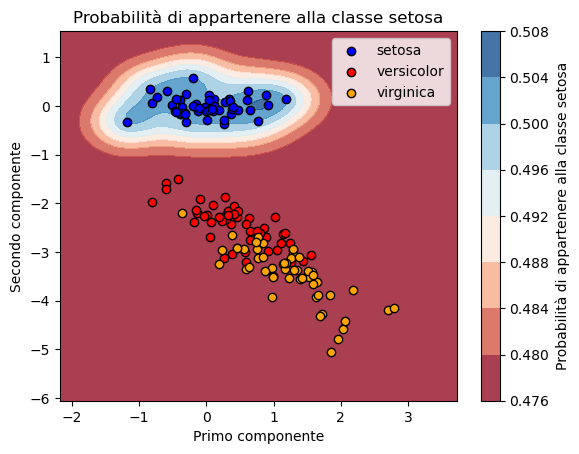

In [46]:
from sklearn.decomposition import PCA

def plot_oneclass_prob(X, Y, Z, str_X, str_Y, str_Z):

    X = X.values
    Y = Y.values
    Z = Z.values

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    Y_reduced = pca.transform(Y)
    Z_reduced = pca.transform(Z)

    clf = svm.OneClassSVM(kernel='rbf', gamma='scale', nu=0.01) 
    clf.fit(X_reduced)

    x_min = min(X_reduced[:, 0].min() - 1, Y_reduced[:, 0].min() - 1, Z_reduced[:, 0].min() - 1)
    x_max = max(X_reduced[:, 0].max() + 1, Y_reduced[:, 0].max() + 1, Z_reduced[:, 0].max() + 1)

    y_min = min(X_reduced[:, 1].min() - 1, Y_reduced[:, 1].min() - 1, Z_reduced[:, 1].min() - 1)
    y_max = max(X_reduced[:, 1].max() + 1, Y_reduced[:, 1].max() + 1, Z_reduced[:, 1].max() + 1)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z_distance = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z_distance = Z_distance.reshape(xx.shape)

    Z_prob = 1 / (1 + np.exp(-Z_distance))


    plt.contourf(xx, yy, Z_prob, cmap=plt.cm.RdBu, alpha=0.8)
    plt.colorbar(label='Probabilità di appartenere alla classe ' + str_X)
    plt.xlabel('Primo componente')
    plt.ylabel('Secondo componente')
    plt.title('Probabilità di appartenere alla classe ' + str_X)

    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], color='blue', label=str_X, edgecolor='k')
    plt.scatter(Y_reduced[:, 0], Y_reduced[:, 1], color='red', label=str_Y, edgecolor='k')
    plt.scatter(Z_reduced[:, 0], Z_reduced[:, 1], color='orange', label=str_Z, edgecolor='k')

    plt.legend()
    plt.show()

plot_oneclass_prob(setosa, versicolor, virginica, 'setosa', 'versicolor', 'virginica')

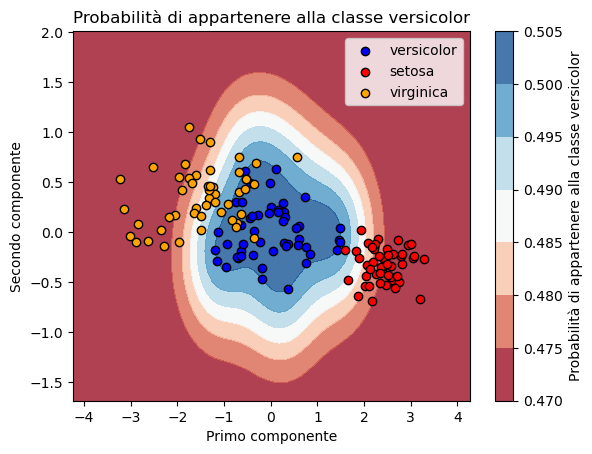

In [47]:
plot_oneclass_prob(versicolor, setosa, virginica, 'versicolor', 'setosa', 'virginica')

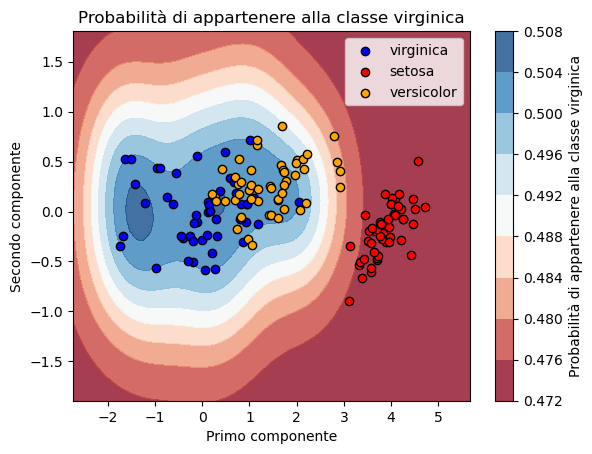

In [48]:
plot_oneclass_prob(virginica, setosa, versicolor, 'virginica', 'setosa', 'versicolor')